<a href="https://colab.research.google.com/github/Nathan499/CS-167/blob/main/Project1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | 2/2                    |
| 2: Data Prep            | 2/2                    |
| 3: Research             | /10                   |
| 4: Analysis             | /10                   |
| 5: Bumps in the Road.   | /1                    |
| Total                   | /25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I used the IMDB video games data set that was provided for this project. I am going to attempt to predict the ratings that the video games received by IMDB depending the on the year that they were created, the genre of the video game, and also the certification of the video game such as "PG-13". 

Here is the link to the Kaggle dataset that was provided:
https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games 

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

I started out by loading in the data from my computer but then I had to make sure I got rid of columns that either we could not analyze yet because of the text or just columns that were not needed. Thse columns were the index that they provided, plot, names, and URL columns. I also then eventually subset the data farther to exclude the votes column due to the amount of values missing as well as the formatting that would have had to take place because any value above 999 was a string because it was formatted as '1,017'. I also did not find this column to be useful in trying to predict the rating of the video games. After that I check if there were any missing values and after a long process decided to just drop any missing values in the dataset because there is plenty of entries still present. I then went on to create dummy variables for the certification column that had what the video games was rated such as "PG-13". After that I went through the columns that provide for the genre of the video games such as "adventure" and make sure I replaced the True and False's with 1 being for True and 0 being for False. I am certain that the data should be prepared for the future use because it should all be numbers that can be use for regression to find the target variable of the video games rating. I then went further and used the StandardScaler and train_test_split features from sklearn to be able to split the data into training and testing and then to normalize it so I would be able to compare the original splits with the normalized data later to see if there is a difference.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
from math import nan
from numpy import NaN
# load and preapre your data here:
#importing pandas, splitting method, and standardscalar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#loading in the data
path = '/content/drive/MyDrive/CS 167/imdb-videogames.csv'
games = pd.read_csv(path)

#Make sure to drop the plot and url columns because not able to analyze text 
#This drops both the index, names, Plot, and URL columns
#Also now dropping votes due to the use of strings for anything above 999 votes
games = games[['year', 'certificate', 'rating', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
games.head()

#Removing Missing values
games.isna().any()

#There are missing values in Year, Certificate, Rating, and Votes
games.dropna(inplace = True)


#Then create dumby variable (certificate, Genres)
#Getting dummy variables for the certificate
data = pd.get_dummies(games, columns = ['certificate'])
#replacing True and False with 0 and 1's in Genre categories
data.Action.replace(True, 1, inplace = True)
data.Action.replace(False, 0, inplace = True)
#Adventure
data.Adventure.replace(True, 1, inplace = True)
data.Adventure.replace(False, 0, inplace = True)
#Comedy
data.Comedy.replace(True, 1, inplace = True)
data.Comedy.replace(False, 0, inplace = True)
#Crime
data.Crime.replace(True, 1, inplace = True)
data.Crime.replace(False, 0, inplace = True)
#Family
data.Family.replace(True, 1, inplace = True)
data.Family.replace(False, 0, inplace = True)
#Fantasy
data.Fantasy.replace(True, 1, inplace = True)
data.Fantasy.replace(False, 0, inplace = True)
#Mystery
data.Mystery.replace(True, 1, inplace = True)
data.Mystery.replace(False, 0, inplace = True)
#Sci -Fi
data['Sci-Fi'].replace(True, 1, inplace = True)
data['Sci-Fi'].replace(False, 0, inplace = True)
#Thriller
data.Thriller.replace(True, 1, inplace = True)
data.Thriller.replace(False, 0, inplace = True)


#Splitting Testing and Training Datasets
target = "rating"
predictors = data.columns.drop(target)

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
train_data.head()

#Testing to see split in data
print(train_data.shape, test_data.shape)

#normalizing the data with standardscalar
scaler = StandardScaler()
scaler.fit(train_data)

train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

(5279, 31) (1320, 31)


,year,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,...,certificate_MA-13,certificate_MA-17,certificate_Not Rated,certificate_PG,certificate_PG-13,certificate_Passed,certificate_T,certificate_TV-14,certificate_TV-MA,certificate_Unrated
19026,2018.0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
19448,2014.0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15961,2009.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3990,2001.0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1731,1997.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__ 

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data. 

For each of the above models, you need to include a __graph of at least 1 tuned parameter__. 


kNN r2 score: -0.09447709872472632
Normalized kNN r2 score: -0.028057548459274884

weighted kNN r2 score: -0.2252035147606941
Normalized weighted kNN r2 score: -0.19266185125596746

Decision Tree r2 score: -0.26472409188391954
Normalized Decision Tree r2 score: -0.25890592181109384



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Random Forest r2 score: -1.979490773801214
Normalized Random Forest r2 score: -0.25890592181109384


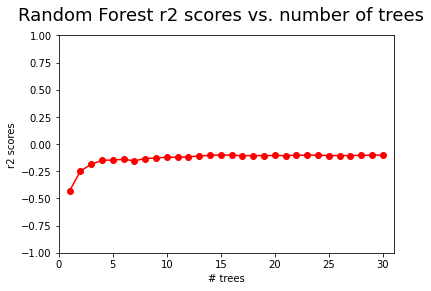

In [58]:
# code goes here... don't forget to include graphs. Professor Moore loves graphs.
from sklearn import neighbors #importing kNN
from sklearn import tree #Importing Decision Trees
from sklearn import ensemble #Importing Random Forests
from sklearn import metrics #importing r2_score
import matplotlib.pyplot as plt #importing plots

#kNN
#Non-normalized
kNN = neighbors.KNeighborsRegressor()
kNN.fit(train_data, train_sln)
preds = kNN.predict(test_data)
print('kNN r2 score:', metrics.r2_score(test_sln, preds))

#normalized kNN
kNN = neighbors.KNeighborsRegressor()
kNN.fit(train_data_normalized, train_sln)
preds = kNN.predict(test_data_normalized)
print('Normalized kNN r2 score:', metrics.r2_score(test_sln, preds))

print()

#Weighted kNN
w_kNN = neighbors.KNeighborsRegressor(weights = 'distance')
w_kNN.fit(train_data, train_sln)
preds = w_kNN.predict(test_data)
print('weighted kNN r2 score:', metrics.r2_score(test_sln, preds))

#normalized weight kNN
w_kNN = neighbors.KNeighborsRegressor(weights = 'distance')
w_kNN.fit(train_data_normalized, train_sln)
preds = w_kNN.predict(test_data_normalized)
print('Normalized weighted kNN r2 score:', metrics.r2_score(test_sln, preds))

print()

#Decision Tree
dt = tree.DecisionTreeRegressor()
dt.fit(train_data, train_sln)
preds = dt.predict(test_data)
print('Decision Tree r2 score:', metrics.r2_score(test_sln, preds))

#normalized Decision Tree
dt = tree.DecisionTreeRegressor()
dt.fit(train_data_normalized, train_sln)
preds = dt.predict(test_data_normalized)
print('Normalized Decision Tree r2 score:', metrics.r2_score(test_sln, preds))

print()
#Random Forest
rf = ensemble.RandomForestRegressor()
rf.fit(train_data, train_sln)
preds = dt.predict(test_data)
print('Random Forest r2 score:', metrics.r2_score(test_sln, preds))

#normalized random forests
rf = ensemble.RandomForestRegressor()
rf.fit(train_data_normalized, train_sln)
preds = dt.predict(test_data_normalized)
print('Normalized Random Forest r2 score:', metrics.r2_score(test_sln, preds))

def tune_number_of_trees(n_estimator_values):
    rf_r2scores = []

    for n in n_estimator_values:

        curr_rf = ensemble.RandomForestRegressor(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_r2score = metrics.r2_score(test_sln, curr_predictions)
        rf_r2scores.append(curr_r2score)


    plt.suptitle('Random Forest r2 scores vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('r2 scores')
    plt.plot(n_estimator_values,rf_r2scores,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,-1,1])

    plt.show()
    
tune_number_of_trees(range(1,31))


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |           -.094         |        -.028        |                     |
| w-kNN         |           -.225         |        -.193        |                     |
| decision tree |            -.272        |       -.258         |                     |
| random forest |           -1.9?        |         -.258       |           x          |

*your answer here*

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*